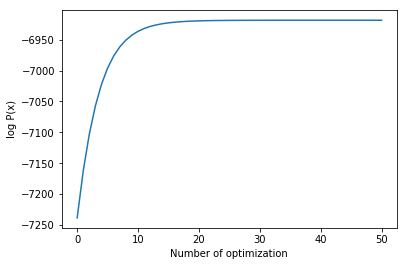

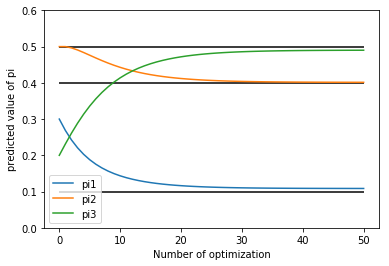

In [48]:
# 図5-2 単調増加するlog P(x)
# 図5-3 パラメータπ_iの推定実験

import numpy as np
import matplotlib.pyplot as plt


pi = np.array([0.1, 0.4, 0.5])# Content rate
theta = np.array([0.8, 0.6, 0.3])# probability of add number is observed

init_pi = np.array([0.3, 0.5, 0.2])

n=10000 # Number of trials
r = np.array([4746, 5254])#r: Number of odd number, even number

pi_all = init_pi.reshape(len(init_pi), 1)
P_X_all = r[0]*np.log(np.sum(init_pi*theta))+r[1]*np.log(np.sum(init_pi*(1-theta))) # P(X)

P_wi_v1 = init_pi*theta/np.sum(init_pi*theta)#P(ω_i | v_1)
P_wi_v2 = init_pi*(1-theta)/np.sum(init_pi*(1-theta))#P(ω_i | v_2)
pi_new = (r[0] * P_wi_v1 + r[1] * P_wi_v2) / n
pi_all = np.append(pi_all, pi_new.reshape(len(init_pi), 1), axis=1)
P_X_all = np.append(P_X_all, r[0]*np.log(np.sum(pi_new*theta))+r[1]*np.log(np.sum(pi_new*(1-theta))))

for i in range(1, 50):
    P_wi_v1 = pi_new*theta/np.sum(pi_new*theta)
    P_wi_v2 = pi_new*(1-theta)/np.sum(pi_new*(1-theta))
    pi_new = (r[0] * P_wi_v1 + r[1] * P_wi_v2) / n
    pi_all = np.append(pi_all, pi_new.reshape(len(init_pi), 1), axis=1)
    P_X_all = np.append(P_X_all, r[0]*np.log(np.sum(pi_new*theta))+r[1]*np.log(np.sum(pi_new*(1-theta))))

plt.plot(P_X_all)
plt.xlabel("Number of optimization")
plt.ylabel("log P(x)")
plt.show()

    
for i in range(len(init_pi)):
    plt.plot(pi_all[i,:], label="pi{}".format(i+1), )
    plt.hlines(pi[i], 0, 50)
plt.ylim(0, 0.6)
plt.xlabel("Number of optimization")
plt.ylabel("predicted value of pi")
plt.legend()
plt.show()